In [1]:
import pandas as pd
import numpy as np
from shapely import geometry
%matplotlib inline
import os
from matplotlib import pyplot as plt
from skimage.draw import circle



In [4]:
# Read file in
data = pd.read_table('files/MP-4_[64748,12998]_cell_seg_data.txt')

# Split by phenotype
CD34_df = data.loc[data['Phenotype'] == 'CD34']
CD38_df = data.loc[data['Phenotype'] == 'CD38']
CD90_df = data.loc[data['Phenotype'] == 'CD90']
DAPI_df = data.loc[data['Phenotype'] == 'DAPI']

In [94]:
# plot coordinates of cells in dataframe
def plot_coord(x):
    cell_x = x[['Cell X Position']]
    cell_y = x[['Cell Y Position']]
    phenotype = x[['Phenotype']]

    x_list = cell_x['Cell X Position'].tolist()
    y_list = cell_y['Cell Y Position'].tolist()
    xy_list = zip(x_list,y_list)
    
    radii = [10]*len(x_list)
    img = np.zeros((5000,3000), dtype=np.bool)

    for x,y,z in zip(x_list,y_list,radii):
        rr, cc = circle(x,y,z)
        img[rr,cc] = 1
    plt.imshow(img)
    
# Convert shapely point object to coordinates
def point_to_coord(points,circle_buffer,coord_dump):
    for point in points:
        if point.within(circle_buffer):
            #print point,'this point is within:',dapi
            coord_array = np.array(point)
            coord_list = coord_array.tolist()
            coord_dump.append(coord_list)    
            
# Plot coordinates of cells in dataframe
def return_xy(x,y):
    cell_x = x[['Cell X Position']]
    cell_y = x[['Cell Y Position']]
    phenotype = x[['Phenotype']]

    x_list = cell_x['Cell X Position'].tolist()
    y_list = cell_y['Cell Y Position'].tolist()
    xy_list = zip(x_list,y_list)
    xy_points = [geometry.Point(x) for x in xy_list]
    if y == 'points':
        return(xy_points)
    if y == 'coords':
        return(xy_list)

# For each CD90 Cell - Check to see population of cells around it
def cell_count(cell_points,dikt_dump,distance):
    for cell in cell_points:
        # Set circle buffer around each specific cell type
        distance = distance
        circle_buffer = cell.buffer(distance)
        cell_coord = np.array(cell)
        test = str(cell_coord)

        dapi_cells = []
        cd34_cells = []
        cd38_cells = []
        cd90_cells = []

        point_to_coord(dapi_points,circle_buffer,dapi_cells)
        point_to_coord(cd34_points,circle_buffer,cd34_cells)
        point_to_coord(cd38_points,circle_buffer,cd38_cells)
        point_to_coord(cd90_points,circle_buffer,cd90_cells)
        
        final_value = [len(dapi_cells),len(cd34_cells),len(cd38_cells),len(cd90_cells)]
        dikt_dump[test] = final_value



In [208]:
len(CD38_df)

269

31

In [400]:
cd34_points = return_xy(CD34_df,'points')
cd38_points = return_xy(CD38_df,'points')
cd90_points = return_xy(CD90_df,'points')
dapi_points = return_xy(DAPI_df,'points')

all_points = return_xy(data,'points')

cd90_coords = return_xy(CD90_df,'coords')

In [190]:
cell_count(cd38_points,lol_what,300)

In [133]:
dapi_num = [values[0] for values in lol_what.values()]
cd34_num = [values[1] for values in lol_what.values()]
cd38_num = [values[2] for values in lol_what.values()]
cd90_num = [values[3] for values in lol_what.values()]


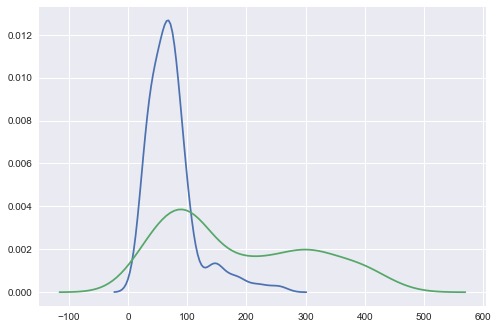

In [210]:

sns.distplot(dapi_num, hist=False, rug=False)
sns.distplot(cd34_num, hist=False, rug=False)
sns.distplot(cd38_num, hist=False, rug=False)
sns.distplot(cd90_num, hist=True, rug=True)
sns.plt.show()


In [74]:
import pandas as pd
import numpy as np
from shapely import geometry
%matplotlib inline
import os
from matplotlib import pyplot as plt
from skimage.draw import circle
import seaborn as sns

class Point:
    """ Point class for representing and manipulating x,y coordinates. """

    def __init__(self, data):
        """ Create a new point at the given coordinates. """
        self.x = data
        #self.y = 
        #cell types include: DAPI, CD34, CD38, CD90, ALL
        #self.y = cell_type

    def plot_cell(self,cell,poordinates):
        
        
        img = np.zeros((5000,3000), dtype=np.bool)
        
        xy_list = self.point_or_coord(cell,poordinates)
        radii = [8]*len(xy_list)

        for x,z in zip(xy_list,radii):
            rr, cc = circle(x[0],x[1],z)
            img[rr,cc] = 1
        print 'Number of %s Cells: %s' %(cell,len(xy_list))
        plt.imshow(img)
            
    def point_or_coord(self,cell,poordinates):
        
        if cell == 'ALL':
            cell_type = self.x
        else:
            cell_type = self.x.loc[data['Phenotype'] == cell]
       
        cell_x = cell_type[['Cell X Position']]
        cell_y = cell_type[['Cell Y Position']]
        phenotype = cell_type[['Phenotype']]
        
        x_list = cell_x['Cell X Position'].tolist()
        y_list = cell_y['Cell Y Position'].tolist()
        xy_list = zip(x_list,y_list)

        xy_points = [geometry.Point(x) for x in xy_list]
        if poordinates == 'points':
            return(xy_points)
        if poordinates == 'coords':
            return(xy_list)

    
    def test(self,points,circle_buffer,coord_dump):
        for point in points:
            if point.within(circle_buffer):
                #print point,'this point is within:',dapi
                coord_array = np.array(point)
                coord_list = coord_array.tolist()
                coord_dump.append(coord_list)
    
    
    def cell_count(self,cell,poordinates,distance):
        cell_counts = {}
        
        # Get points of Cell to Analyze 
        cell_to_analyze = self.point_or_coord(cell,poordinates)
        
        # Get points of all various cells of different phenotypes
        DAPI_cells = self.point_or_coord('DAPI','points')
        CD34_cells = self.point_or_coord('CD34','points')
        CD38_cells = self.point_or_coord('CD38','points')
        CD90_cells = self.point_or_coord('CD90','points')
        
        for cell in cell_to_analyze:
            # Set circle buffer around each specific cell type
            distance = distance
            circle_buffer = cell.buffer(distance)
            cell_coord = np.array(cell)
            cell_key = str(cell_coord)

            dapi_cells = []
            cd34_cells = []
            cd38_cells = []
            cd90_cells = []
            
            #return(len(DAPI_cells),circle_buffer,dapi_cells)
            self.test(DAPI_cells,circle_buffer,dapi_cells)
            self.test(CD34_cells,circle_buffer,cd34_cells)
            self.test(CD38_cells,circle_buffer,cd38_cells)
            self.test(CD90_cells,circle_buffer,cd90_cells)

            final_value = [len(dapi_cells),len(cd34_cells),len(cd38_cells),len(cd90_cells)]
            cell_counts[cell_key] = final_value
        
        
        dapi_num = [values[0] for values in cell_counts.values()]
        cd34_num = [values[1] for values in cell_counts.values()]
        cd38_num = [values[2] for values in cell_counts.values()]
        cd90_num = [values[3] for values in cell_counts.values()]

        return(dapi_num,cd34_num,cd38_num,cd90_num)
        
    def distribution_plot(dapi,cd34,cd38):

        sns.distplot(dapi, hist=False, rug=False)
        sns.distplot(cd34, hist=False, rug=False)
        sns.distplot(cd38, hist=False, rug=False)
        #sns.distplot(cd90_num, hist=False, rug=False)
        sns.plt.show()

In [75]:
image = Point(data)

In [70]:
test = image.cell_count('CD38','points',300)

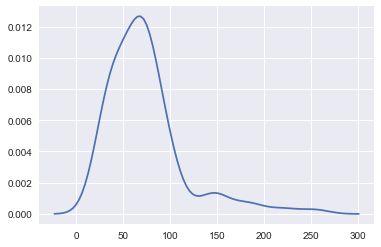

In [85]:
sns.distplot(test[0],hist=False,rug=False)

Number of ALL Cells: 7476


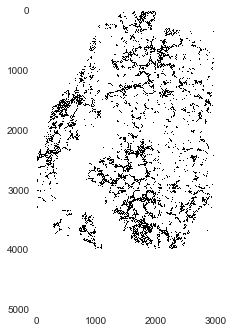

In [55]:
image.plot_cell(cell='ALL',poordinates='coords')